In [28]:
from azure.storage.blob import BlockBlobService
from io import StringIO
import datetime
from pylab import rcParams
import warnings
import itertools
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn import metrics
import plotly.graph_objects as go
from datetime import datetime  
from datetime import timedelta

In [29]:
df = pd.read_csv('forecast.csv',sep = ";")
df['mes'] = pd.to_datetime(df['mes'])
df['year'] = pd.DatetimeIndex(df['mes']).year
df['month'] = pd.DatetimeIndex(df['mes']).month
df['month_year'] = pd.to_datetime(df['mes']).dt.to_period('M')

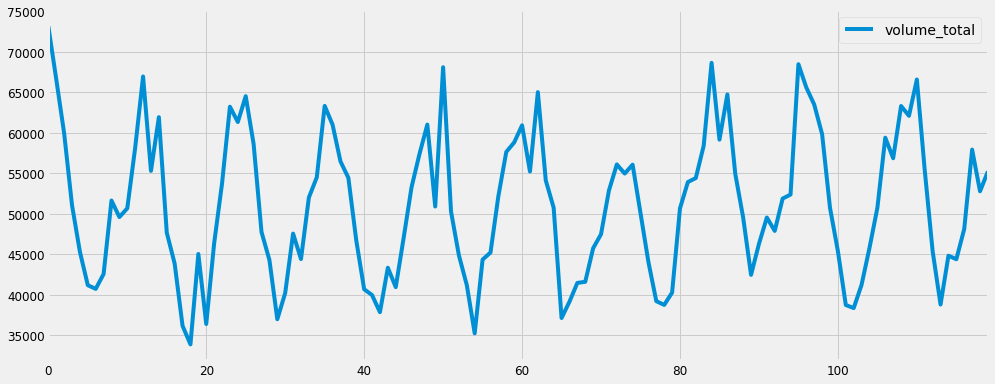

In [30]:
df_ts = df.groupby('month_year')['volume_total'].sum().reset_index()
df_ts.plot(figsize=(15, 6))
plt.show()

In [31]:
df_ts.index.freq = 'MS'
model = ExponentialSmoothing(df_ts["volume_total"], seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=df_ts.index[0], end=df_ts.index[-1]+15)

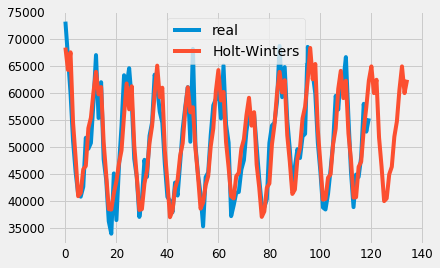

In [32]:
plt.plot(df_ts.index, df_ts["volume_total"], label='real')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [33]:
MAE_train  = metrics.mean_absolute_error(df_ts["volume_total"], pred[0:len(df_ts)])
MSE_train  = metrics.mean_squared_error(df_ts["volume_total"], pred[0:len(df_ts)])
RMSE_train = np.sqrt(metrics.mean_squared_error(df_ts["volume_total"], pred[0:len(df_ts)]))
R_Squared_train  = metrics.r2_score(df_ts["volume_total"],pred[0:len(df_ts)])
metricas_previcão_train = [MAE_train,MSE_train,RMSE_train,R_Squared_train]
name_columns  = ["Erro Médio Absoluto (MAE)","Erro Quadrátio Médio (MSE)","Raiz do Erro Quadrático Médio (RSME)", "R Quadrdo" ]

In [34]:
headerColor = 'darkBlue'
rowEvenColor = 'lightblue'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Métrica de Previsão</b>','<b>Valor</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      name_columns,
        metricas_previcão_train
        ],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.show()